In [1]:
import os
import tkinter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from data_import import import_ppd
from scipy.signal import savgol_filter
from scipy.stats import sem
from scipy.ndimage import gaussian_filter1d, uniform_filter1d

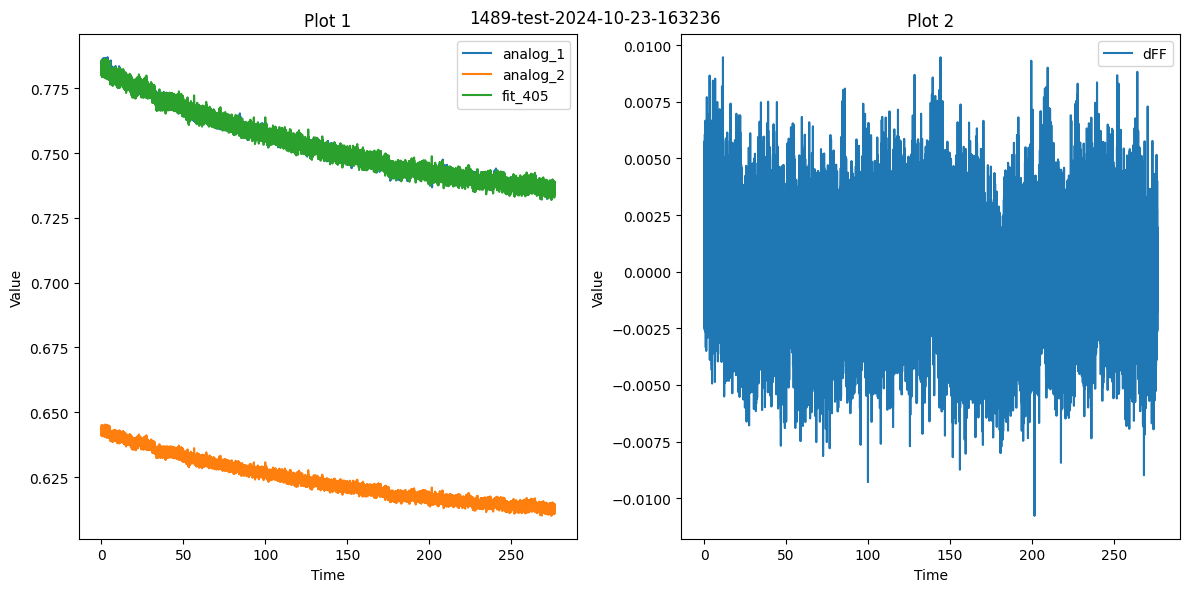

index: (array([33330, 33331, 33333, 33639], dtype=int64),)


In [2]:
# Define the PPD file path
ppd_file_path = r'H:\Jun\1489-test-2024-10-23-163236.ppd'

# Extract the filename without the extension
filename = os.path.splitext(os.path.basename(ppd_file_path))[0]

# Load the data from the CSV file
data = import_ppd(ppd_file_path, low_pass=20, high_pass=0.001)

# Convert sample index to time vector
time = np.arange(len(data['analog_1'])) / 130

# http://dx.doi.org/10.1016/j.cell.2015.07.014
# dFF using 405 fit as baseline
reg= np.polyfit(data['analog_2'], data['analog_1'], 1) # ch1 is 465nm, ch2 is 405nm 
fit_405=reg[0]*data['analog_2']+reg[1]
dFF=(data['analog_1']-fit_405)/fit_405 #this gives deltaF/F
data['fit_405']=fit_405
data['dFF']=dFF

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1
ax1.plot(time, data['analog_1'], label='analog_1')
ax1.plot(time, data['analog_2'], label='analog_2')
ax1.plot(time, data['fit_405'], label='fit_405')

# Set plot 1 properties
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')
ax1.set_title('Plot 1')
ax1.legend()

# Plot 2
ax2.plot(time, data['dFF'], label='dFF')

# Set plot 2 properties
ax2.set_xlabel('Time')
ax2.set_ylabel('Value')
ax2.set_title('Plot 2')
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Set the figure title
fig.suptitle(filename)

# Save the figure as PNG with 300 dpi
save_path = os.path.join(os.path.dirname(ppd_file_path), filename + '.png')
fig.savefig(save_path, dpi=300)

# Display the plots
plt.show()


# Index of np.diff(data['digital_1']) bigger than 0.5 or smaller than -0.5
index = np.where((np.diff(data['digital_1']) > 0.5) | (np.diff(data['digital_1']) < -0.5))

# Print the onsets and offsets
print("index:", index)

dFF = dFF[index[0][0]:]


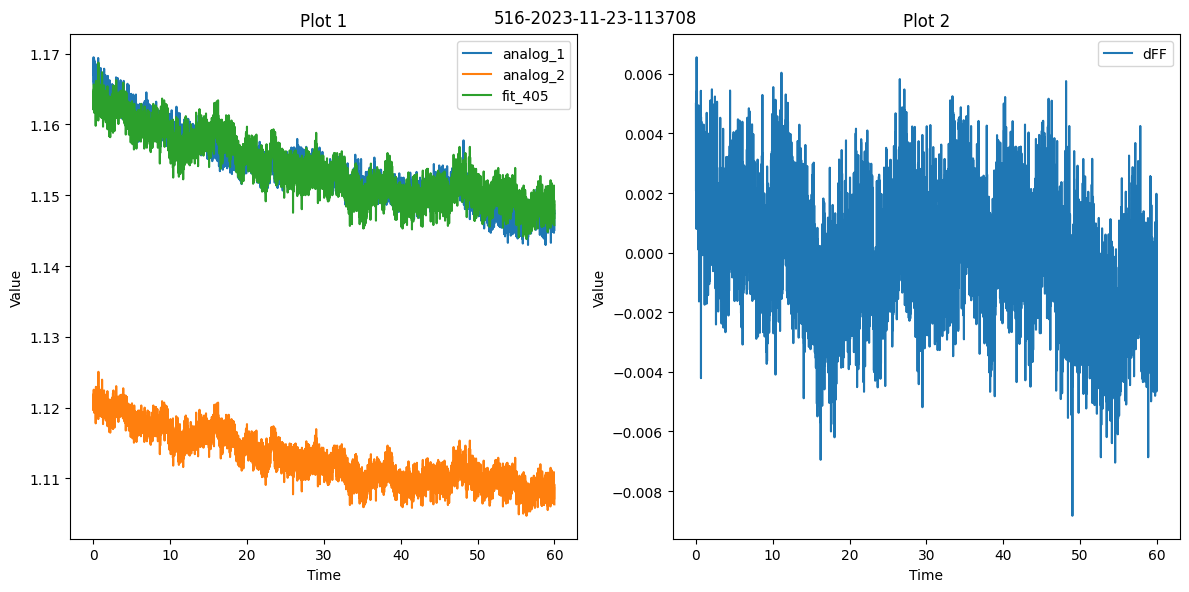

index: (array([1418, 1548, 2848, 2978], dtype=int64),)


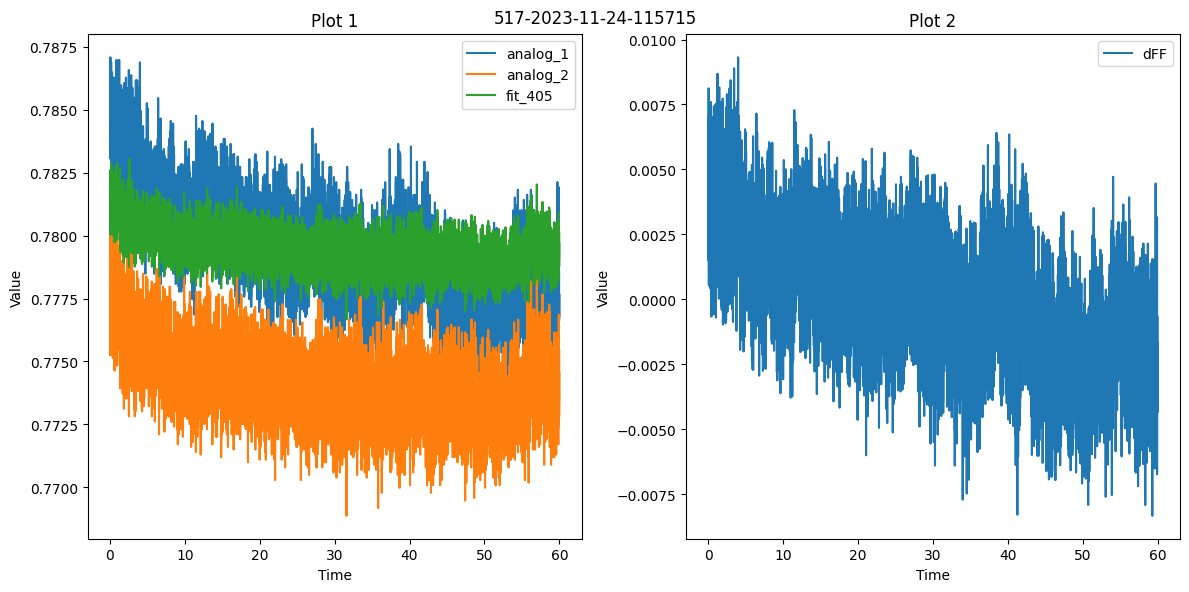

index: (array([ 773,  903, 2203, 2333], dtype=int64),)


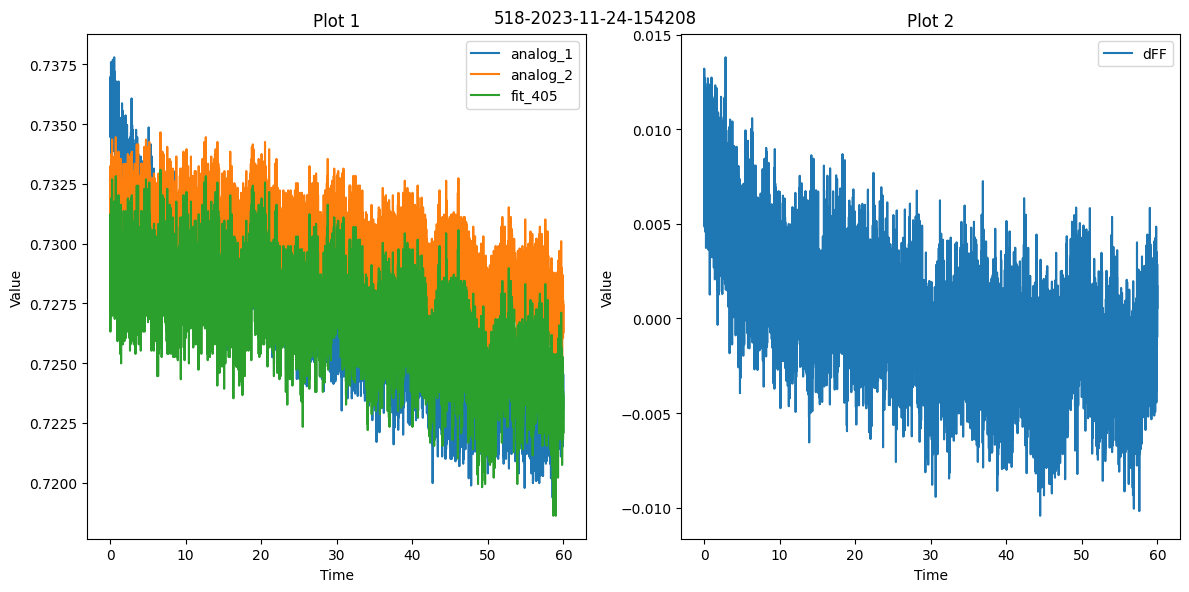

index: (array([1807, 1937, 3237, 3367], dtype=int64),)


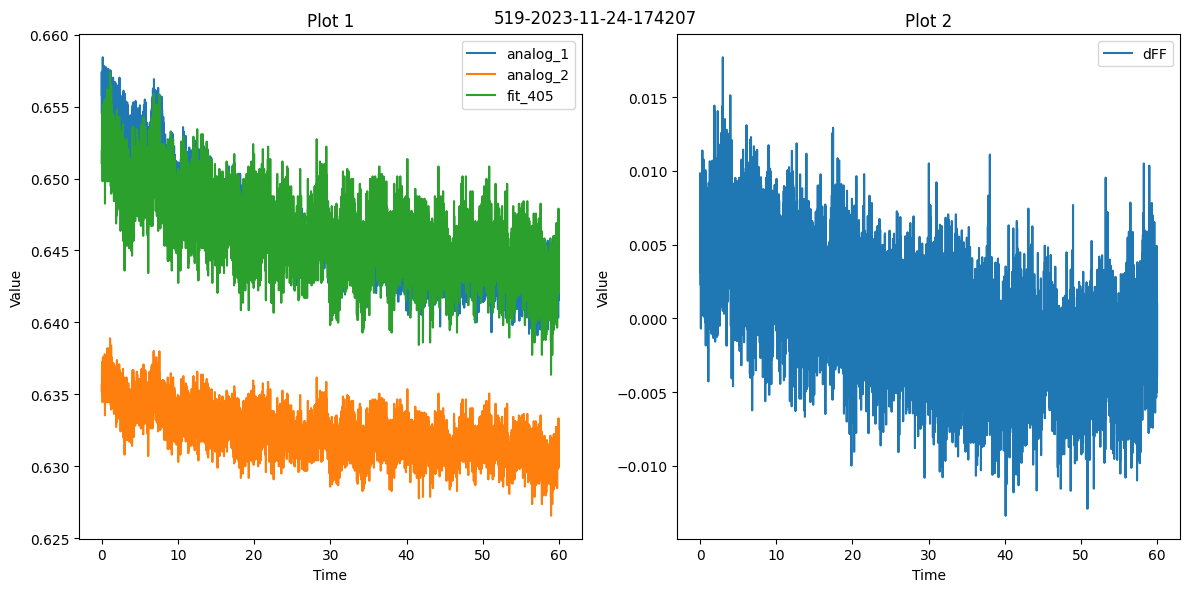

index: (array([1555, 1685, 2985, 3115], dtype=int64),)


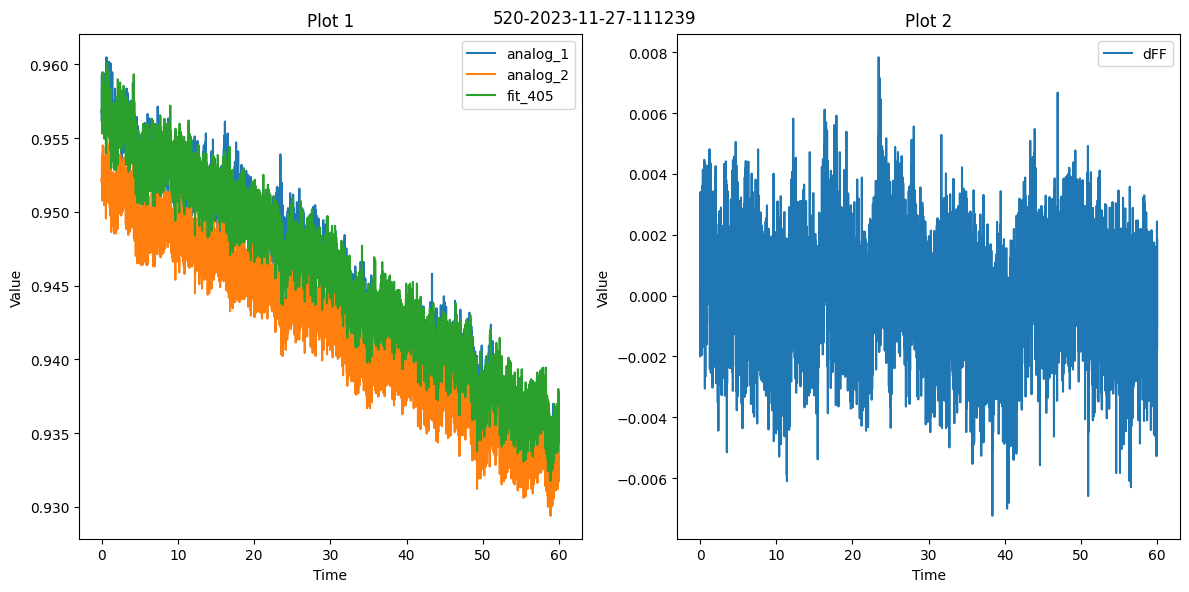

index: (array([ 976, 1106, 2406, 2536], dtype=int64),)


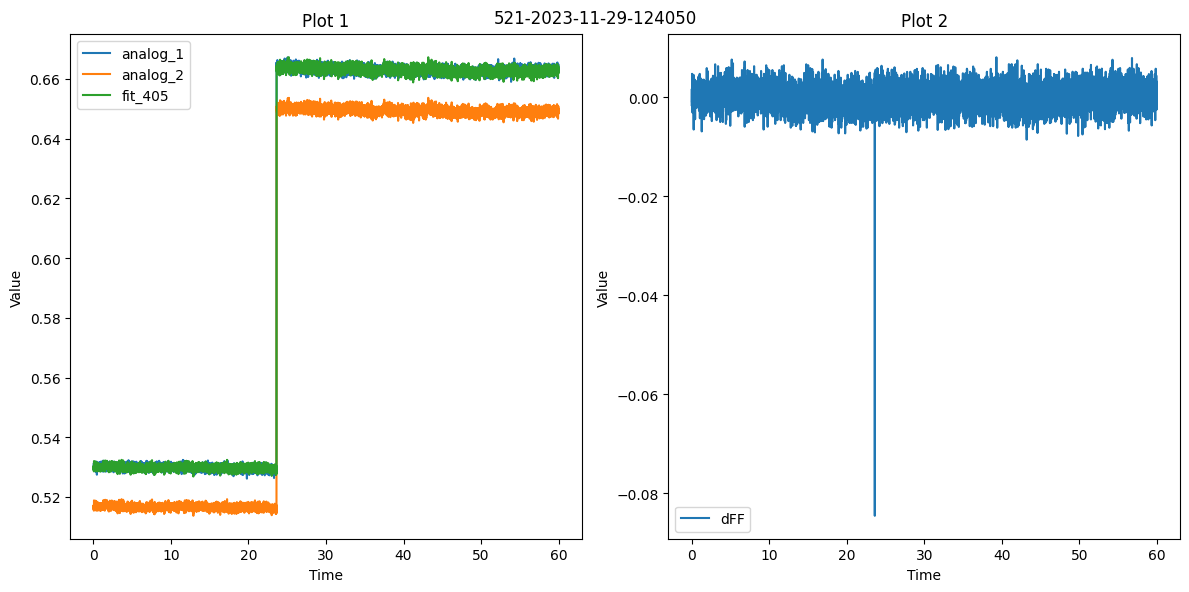

index: (array([6404, 6534, 7834, 7964], dtype=int64),)


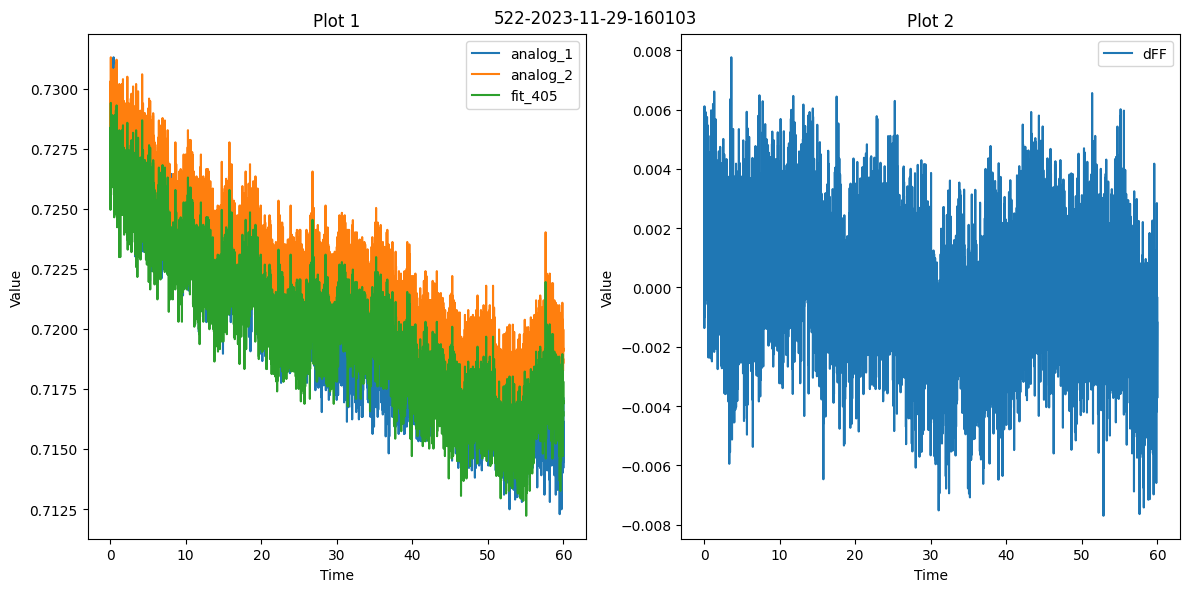

index: (array([ 756,  886, 2186, 2316], dtype=int64),)


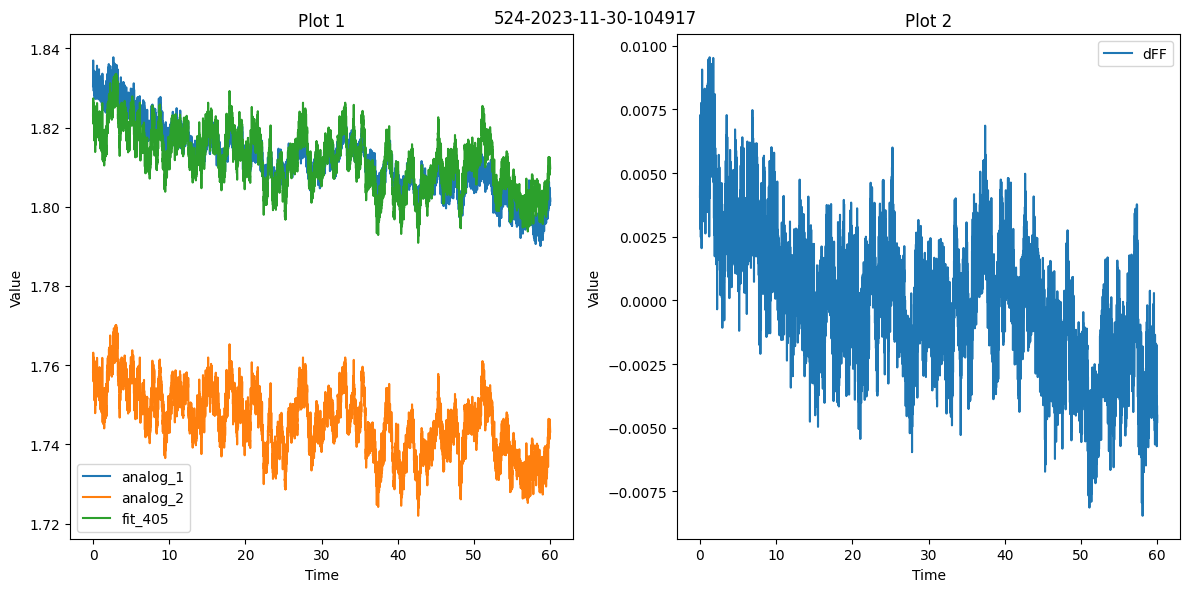

index: (array([13273, 13403, 14703, 14833], dtype=int64),)


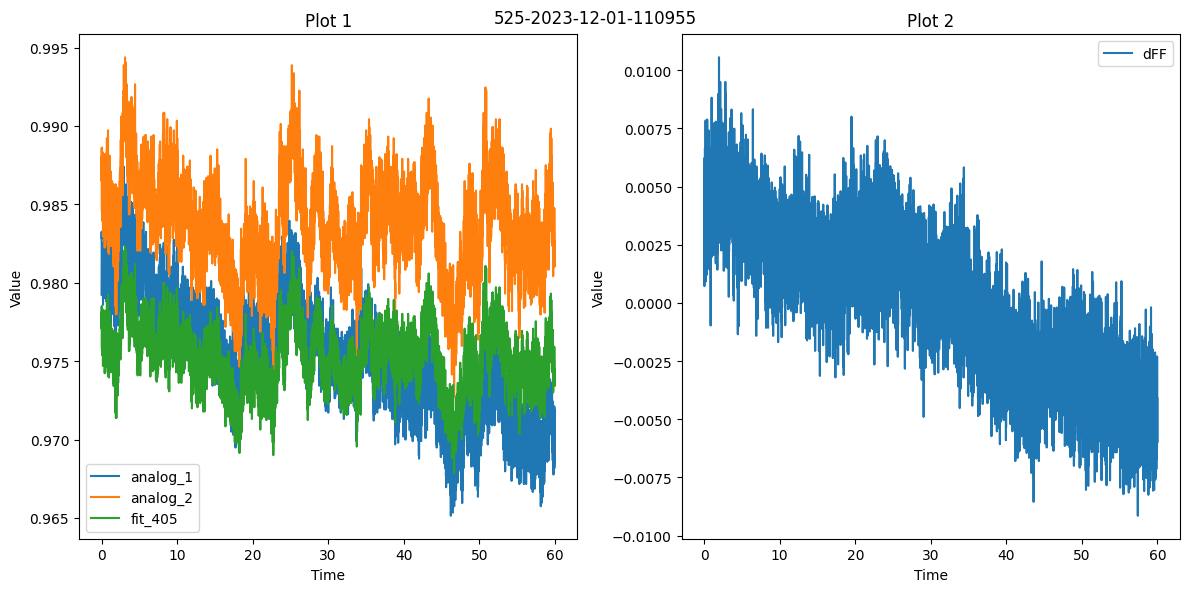

index: (array([3763, 3893, 5193, 5323], dtype=int64),)


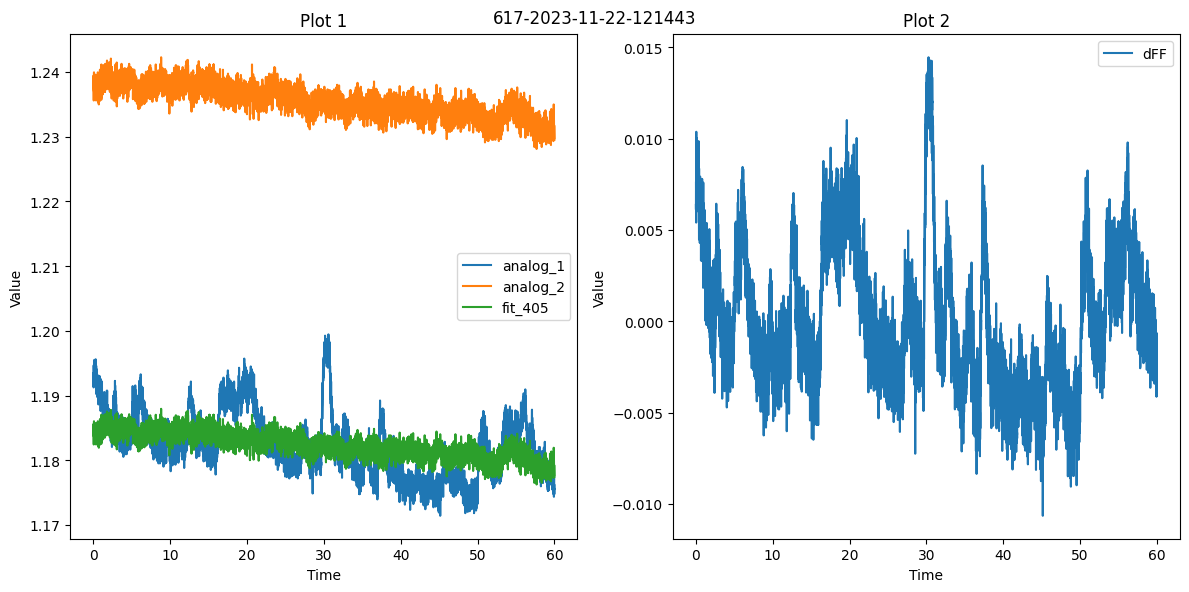

index: (array([1347, 1477, 2777, 2907], dtype=int64),)


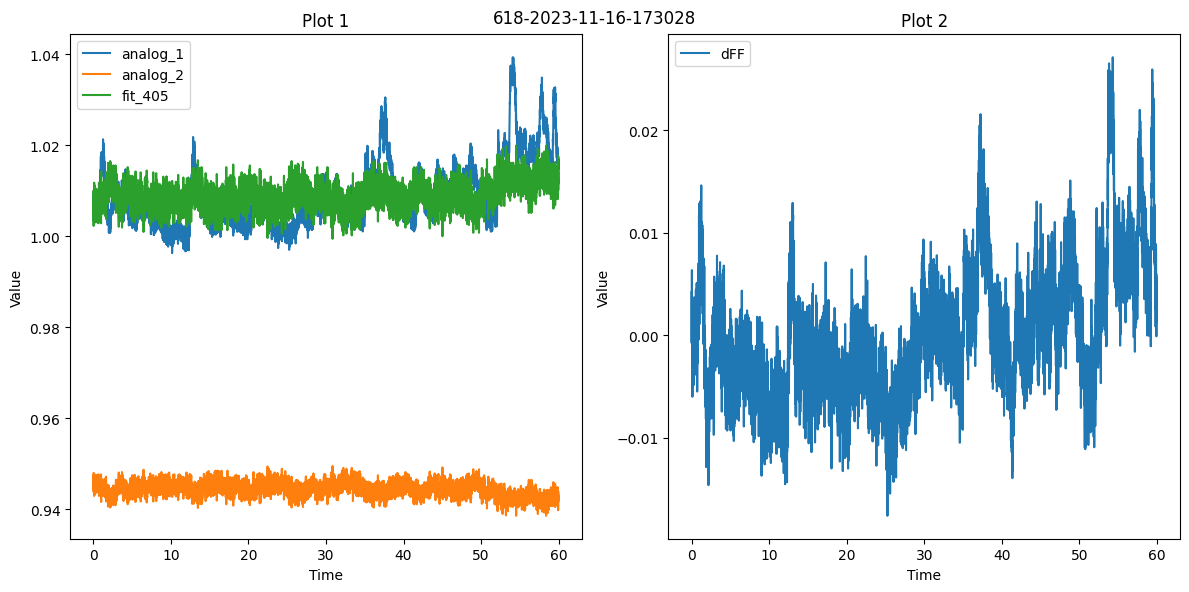

index: (array([1657, 1787, 3087, 3217], dtype=int64),)


In [4]:
# Define the folder containing the PPD files
folder_path = r'H:\Jun\GRABda_test'
folder_path = r'H:\Jun\sensory_stim\fp'
# Define the sampling rate (SR)
SR = 130  # Replace with the actual sampling rate

# Loop through all .ppd files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.ppd'):
        # Define the PPD file path
        ppd_file_path = os.path.join(folder_path, file_name)
        
        # Extract the filename without the extension
        filename = os.path.splitext(os.path.basename(ppd_file_path))[0]
        
        # Load the data from the CSV file
        data = import_ppd(ppd_file_path, low_pass=20, high_pass=0.001)
        
        # Convert sample index to time vector
        time = np.arange(len(data['analog_1'])) / SR
        
        # Calculate the number of samples to plot
        num_samples_to_plot = 60 * SR
        
        # Ensure we don't exceed the length of the data
        num_samples_to_plot = min(num_samples_to_plot, len(data['analog_1']))
        
        # dFF using 405 fit as baseline
        reg = np.polyfit(data['analog_2'][:num_samples_to_plot], data['analog_1'][:num_samples_to_plot], 1)
        fit_405 = reg[0] * data['analog_2'][:num_samples_to_plot] + reg[1]
        dFF = (data['analog_1'][:num_samples_to_plot] - fit_405) / fit_405
        data['fit_405'] = fit_405
        data['dFF'] = dFF
        
        # Create the figure and subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
        
        # Plot 1
        ax1.plot(time[:num_samples_to_plot], data['analog_1'][:num_samples_to_plot], label='analog_1')
        ax1.plot(time[:num_samples_to_plot], data['analog_2'][:num_samples_to_plot], label='analog_2')
        ax1.plot(time[:num_samples_to_plot], data['fit_405'], label='fit_405')
        
        # Set plot 1 properties
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Value')
        ax1.set_title('Plot 1')
        ax1.legend()
        
        # Plot 2
        ax2.plot(time[:num_samples_to_plot], data['dFF'], label='dFF')
        
        # Set plot 2 properties
        ax2.set_xlabel('Time')
        ax2.set_ylabel('Value')
        ax2.set_title('Plot 2')
        ax2.legend()
        
        # Adjust spacing between subplots
        plt.tight_layout()
        
        # Set the figure title
        fig.suptitle(filename)
        
        # Save the figure as PNG with 300 dpi
        save_path = os.path.join(folder_path, filename + '.png')
        fig.savefig(save_path, dpi=300)
        
        # Display the plots
        plt.show()
        
        # Index of np.diff(data['digital_1']) bigger than 0.5 or smaller than -0.5
        index = np.where((np.diff(data['digital_1']) > 0.5) | (np.diff(data['digital_1']) < -0.5))
        
        # Print the onsets and offsets
        print("index:", index)
        
        # dFF = dFF[index[0][0]:]  # This line seems to be incomplete, consider revising it